# The Newton-Raphson method

- work in progress

In [1]:
# Libraries
import math
from statistics import mean, median
import numpy as np
import pandas as pd
from plotnine import ggplot, aes, geom_line, theme_minimal
from IPython.display import display

## Newton-Raphson

$$
f'(x_0)=\frac{f(x)-f(x_0)}{x-x_0} \Rightarrow x=\frac{f(x)-f(x_0)}{f'(x_0)}+x_0
$$

Assume $f(x)=0$, then $0=f'(x_0)(x-x_0)+f(x_0)$ solves for,

$$
x_{n+1}=x_n-\frac{f(x_n)}{f'(x_n)}
$$

In prose, we look for $x_{n+1}$ that takes us to $f(x_n)=y=0$ along the tangent line.

*Central difference quotient* (finite difference approximation of $f'(x)=\underset{h\to 0}{\text{lim}}\frac{f(x+h)-f(x)}{h}$),

$$
D_h f(x) = \frac{f(x+h)-f(x-h)}{2h}
$$

Then, approximate $x_{n+1}$ with the *secant form of Newton's method* like so,

$$
x_{n+1}=x_n-\frac{f(x_n)}{D_h f(x)}
$$

This last formula computes the *approximate Newton update* with a *finite difference* rather than the *Newton-Raphson update* with a *derivative*.

In [2]:
# Central difference quotient
def dhf(x, f, h = 1e-9):
    return (f(x + h) - f(x - h)) / (2 * h)

In [3]:
# Secant form of Newton's method
def newton(x, f, h = 1e-12, tolerance = 1e-12, max_iter = 1000):
    for i in range(max_iter):
        dhf = (f(x + h) - f(x - h)) / (2 * h)
        if abs(dhf) < 1e-15:
            raise ZeroDivisionError("The slope of the function is zero. The Newton approximation is undefined.")
        else:
            xn = x - (f(x) / dhf)
            if abs(xn - x) <= tolerance * max(1.0, abs(x)):
                return xn
            x = xn
    raise RuntimeError(f"The approximation does not converge within {max_iter} iterations.")
    return x

### $r$th root with Newton-Raphson

$$
f(x_n) = x_n^r = a \Rightarrow f(x_n) = x_n^r - a = 0
$$

Where $a \in \mathbb{R}_+$ (the number we are taking the root of) and $x_n$ is the initial guess. Plugging this into the NR formula above, we get,

$$
x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)} = x_n - \frac{x_n^r + a}{rx_n^{r-1}} = \frac{(r-1)x_n^r + a}{rx_n^{r-1}}
$$

For $r=2$, we get,

$$
x_{n+1} = \frac{1}{2}\left(\frac{x_n^2+a}{x_n}\right)
$$

In [4]:
# Square root
def square_root(a, x, iterations=10, tolerance=1e-12):
    if (a < 0):
        raise ValueError("The square root of a negative value is undefined.")
    if (x < 0):
        raise ValueError("The initial guess must be positive.")
        
    for i in range(iterations):
        if abs(x) < 1e-15:
            raise ZeroDivisionError("The initial value results in division by zero.")
            
        xn = 0.5 * ((x ** 2 + a) / x)
        
        if abs(xn - x) < tolerance:
            return xn

        x = xn
    return x

In [5]:
square_root(16, 3)

4.0

In [6]:
square_root(16, 4)

4.0

In [7]:
square_root(16, 5)

4.0

In [8]:
# rth root
def rth_root(a, x, r, iterations=1000, tolerance=1e-12):
    if (a < 0):
        raise ValueError("The square root of a negative value is undefined.")
    if (x < 0):
        raise ValueError("The initial guess must be positive.")
    if (r < 0):
        raise ValueError("The Exponent must be positive.")

    for i in range(iterations):
        if abs(x) < 1e-15:
            raise ZeroDivisionError("The choice of the initial value leads to division by zero.")
        
        f = x ** r
        dfdx = r * (x ** (r - 1))
        xn = (((r - 1) * f) + a) / dfdx

        if abs(xn - x) < tolerance:
            return xn

        x = xn

    if abs(xn - x) >= tolerance:
        raise RuntimeError(f"The approximation has not converged within {iterations} iterations.")
    return x

In [9]:
rth_root(225, 20, 2)

15.0

In [10]:
rth_root(225, 15, 2)

15.0

In [11]:
rth_root(225, 10, 2)

15.0

### Convergence paths

In [12]:
# rth root
def rth_rootx(a, x, r, iterations=1000, tolerance=1e-12):
    if (a < 0):
        raise ValueError("The rth root of a negative value is undefined.")
    if (x < 0):
        raise ValueError("The initial guess must be positive.")
    if (r < 0):
        raise ValueError("The Exponent must be positive.")

    xs = [x]

    for i in range(iterations):
        f = x ** r
        dfdx = r * (x ** (r - 1))

        if abs(dfdx) < 1e-15:
            raise ZeroDivisionError("The choice of the initial value leads to division by zero.")
        
        xn = (((r - 1) * f) + a) / dfdx

        xs.append(xn)
        
        if abs(xn - x) < tolerance:
            return {"root": xn, "path": xs}
            
        x = xn

    return {"root": x, "path": xs}

    if abs(xn - x) >= tolerance:
        raise RuntimeError(f"The approximation has not converged within {iterations} iterations.")

The convergence path for the initial value x = 1:

Convergence achieved in 10 steps.

The average step size is 29.665 and the median is 15.215.

   idx       value
0    0    1.000000
1    1  113.000000
2    2   57.495575
3    3   30.704460
4    4   19.016193
5    5   15.424107
6    6   15.005831
7    7   15.000001
8    8   15.000000
9    9   15.000000


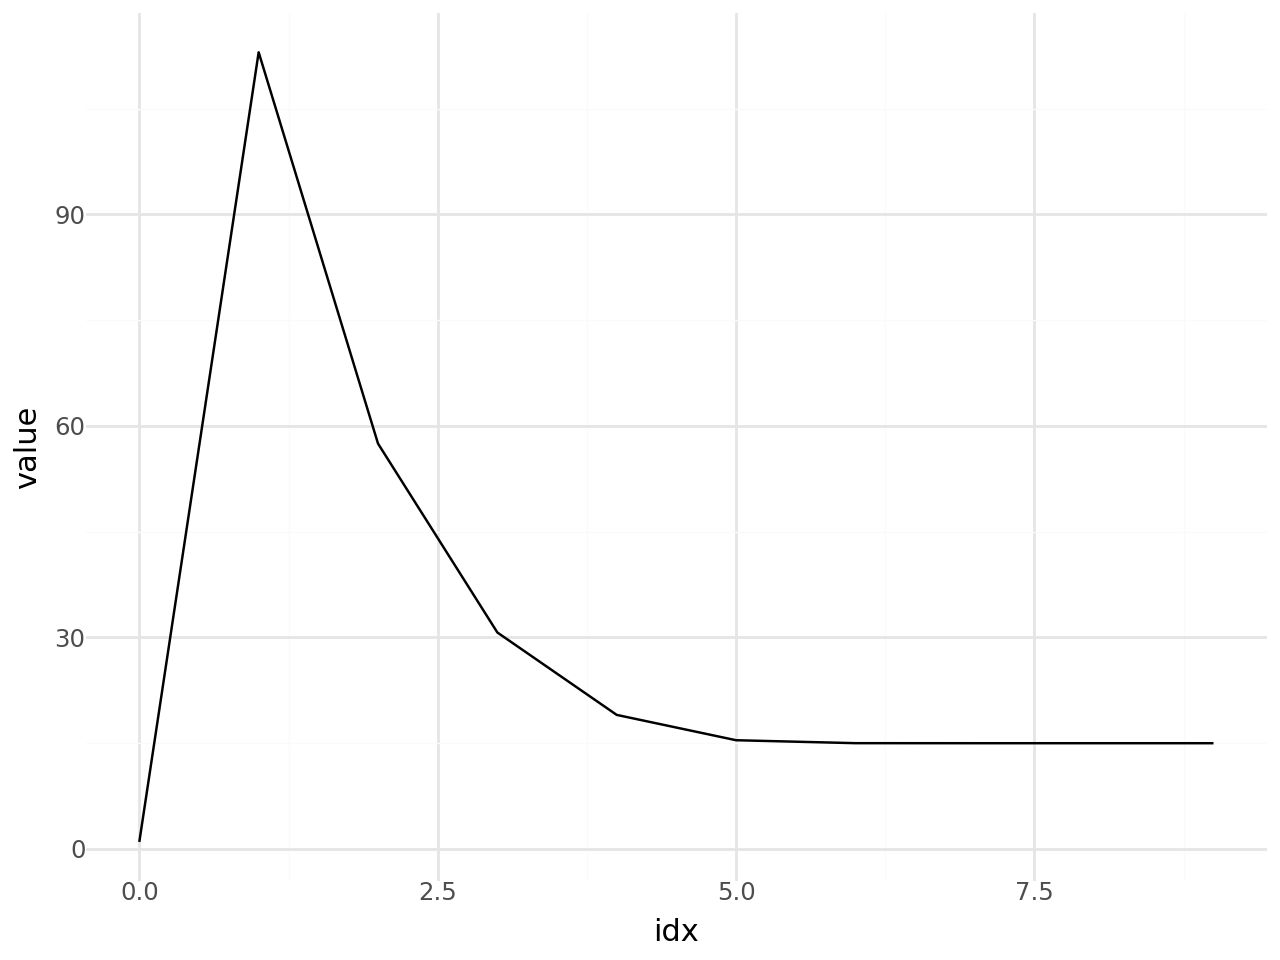

The convergence path for the initial value x = 5:

Convergence achieved in 8 steps.

The average step size is 15.265 and the median is 15.0.

   idx      value
0    0   5.000000
1    1  25.000000
2    2  17.000000
3    3  15.117647
4    4  15.000458
5    5  15.000000
6    6  15.000000
7    7  15.000000


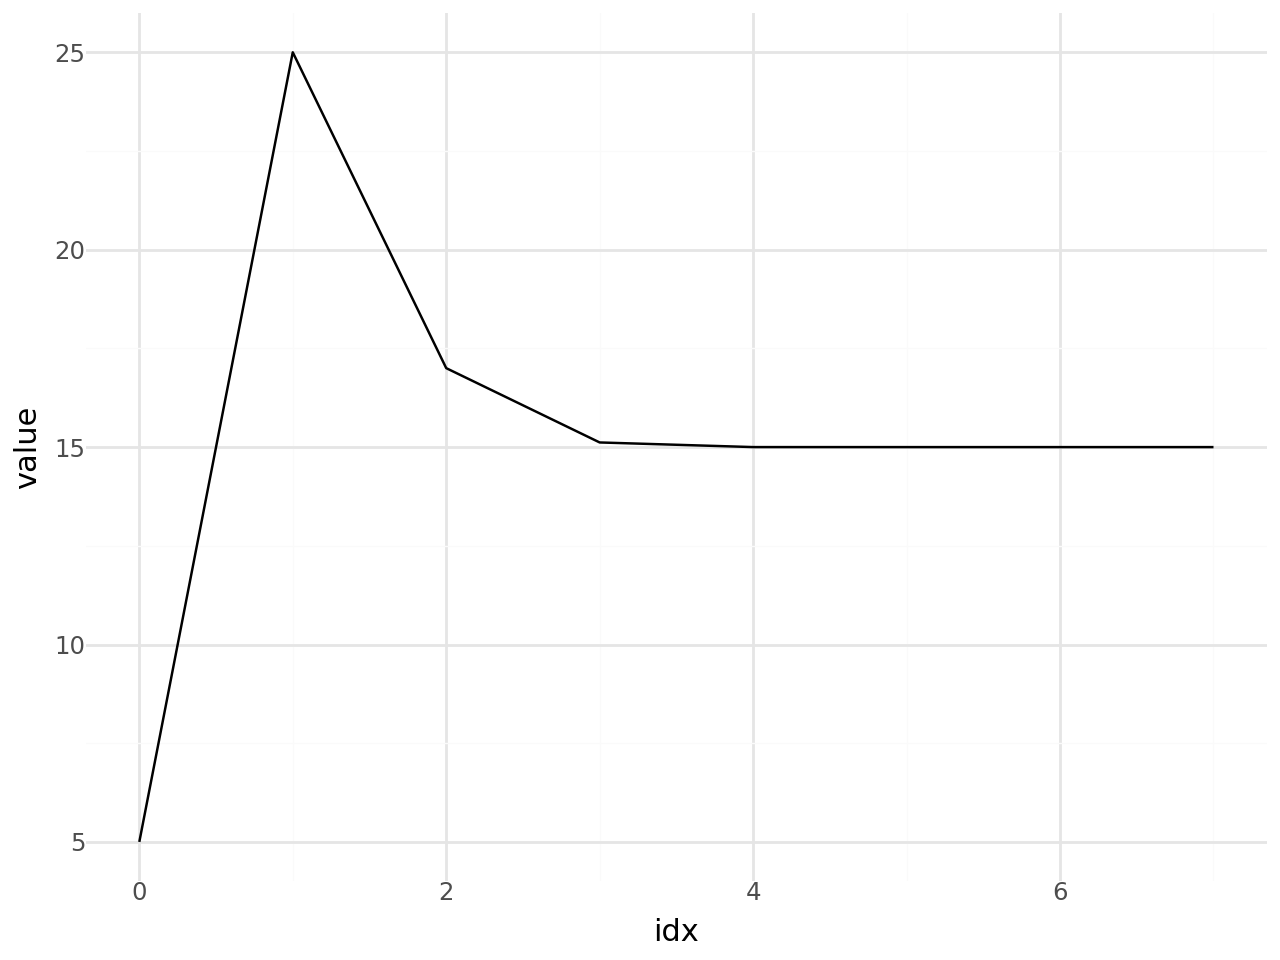

The convergence path for the initial value x = 10:

Convergence achieved in 7 steps.

The average step size is 14.471 and the median is 15.0.

   idx      value
0    0  10.000000
1    1  16.250000
2    2  15.048077
3    3  15.000077
4    4  15.000000
5    5  15.000000
6    6  15.000000


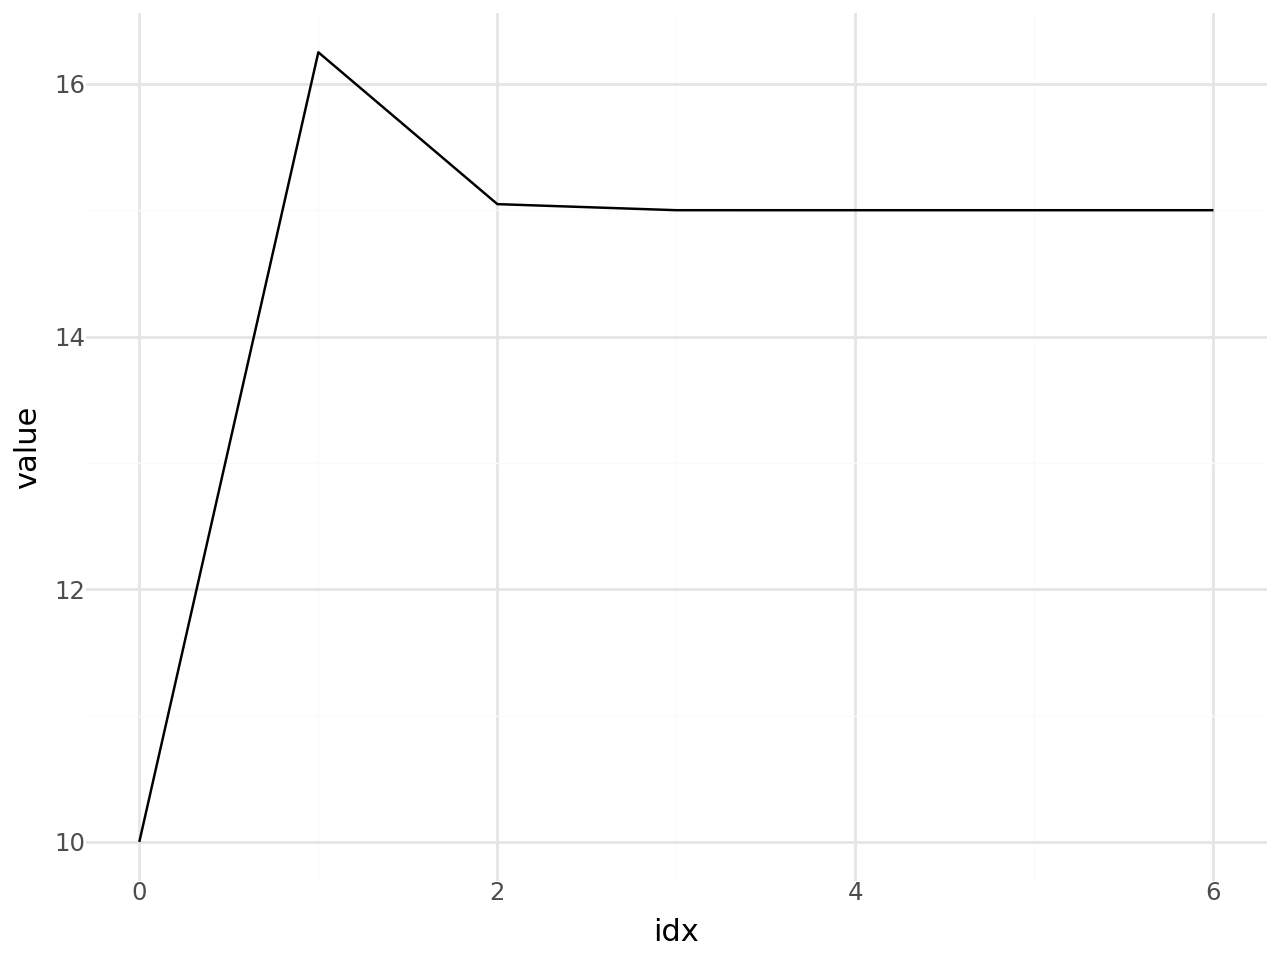

The convergence path for the initial value x = 15:

Convergence achieved in 2 steps.

The average step size is 15.0 and the median is 15.0.

   idx  value
0    0   15.0
1    1   15.0


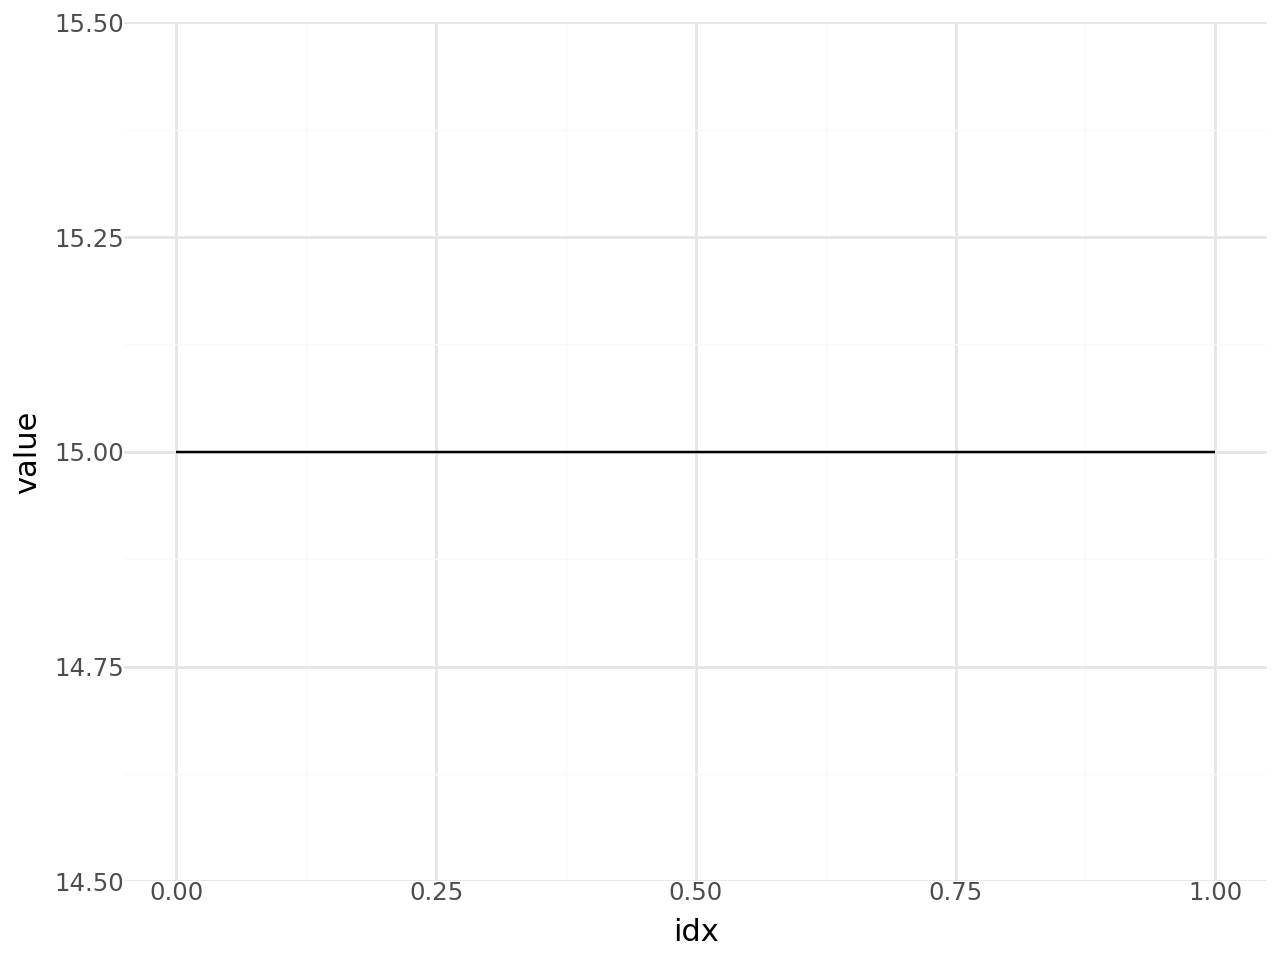

The convergence path for the initial value x = 20:

Convergence achieved in 6 steps.

The average step size is 15.94 and the median is 15.006.

   idx      value
0    0  20.000000
1    1  15.625000
2    2  15.012500
3    3  15.000005
4    4  15.000000
5    5  15.000000


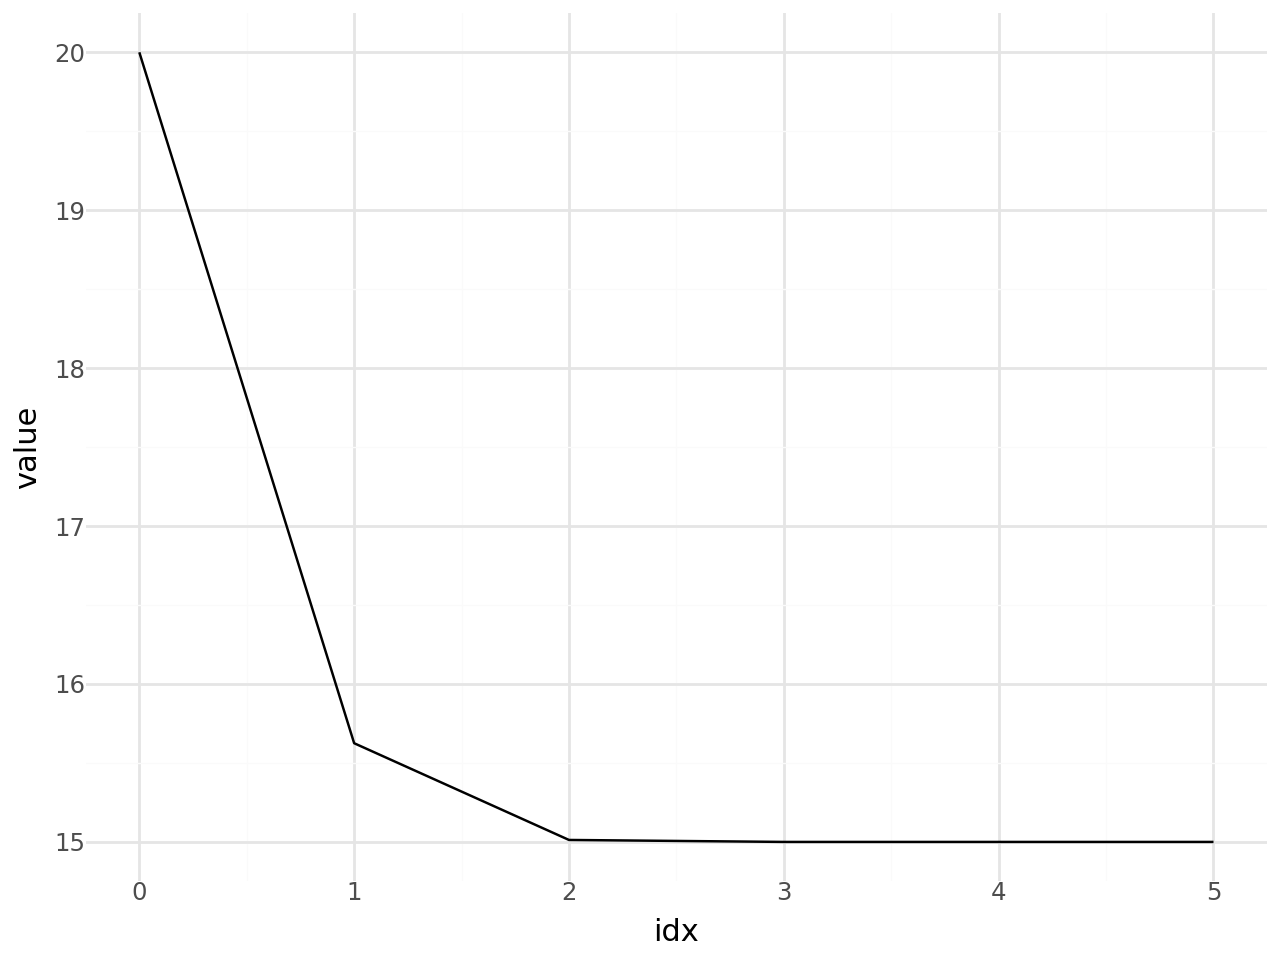

The convergence path for the initial value x = 25:

Convergence achieved in 7 steps.

The average step size is 16.731 and the median is 15.0.

   idx      value
0    0  25.000000
1    1  17.000000
2    2  15.117647
3    3  15.000458
4    4  15.000000
5    5  15.000000
6    6  15.000000


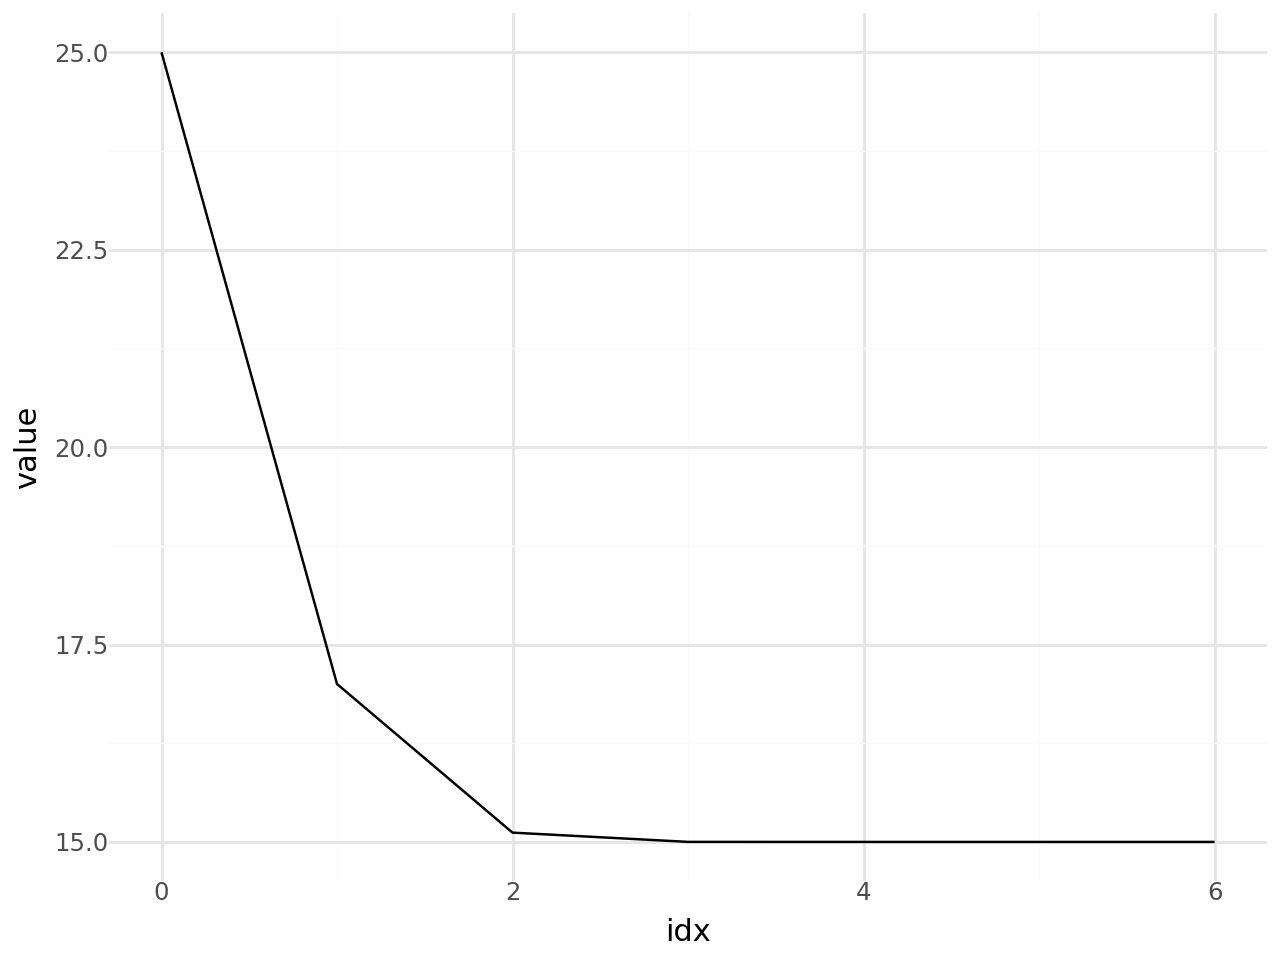

The convergence path for the initial value x = 30:

Convergence achieved in 7 steps.

The average step size is 17.733 and the median is 15.005.

   idx      value
0    0  30.000000
1    1  18.750000
2    2  15.375000
3    3  15.004573
4    4  15.000001
5    5  15.000000
6    6  15.000000


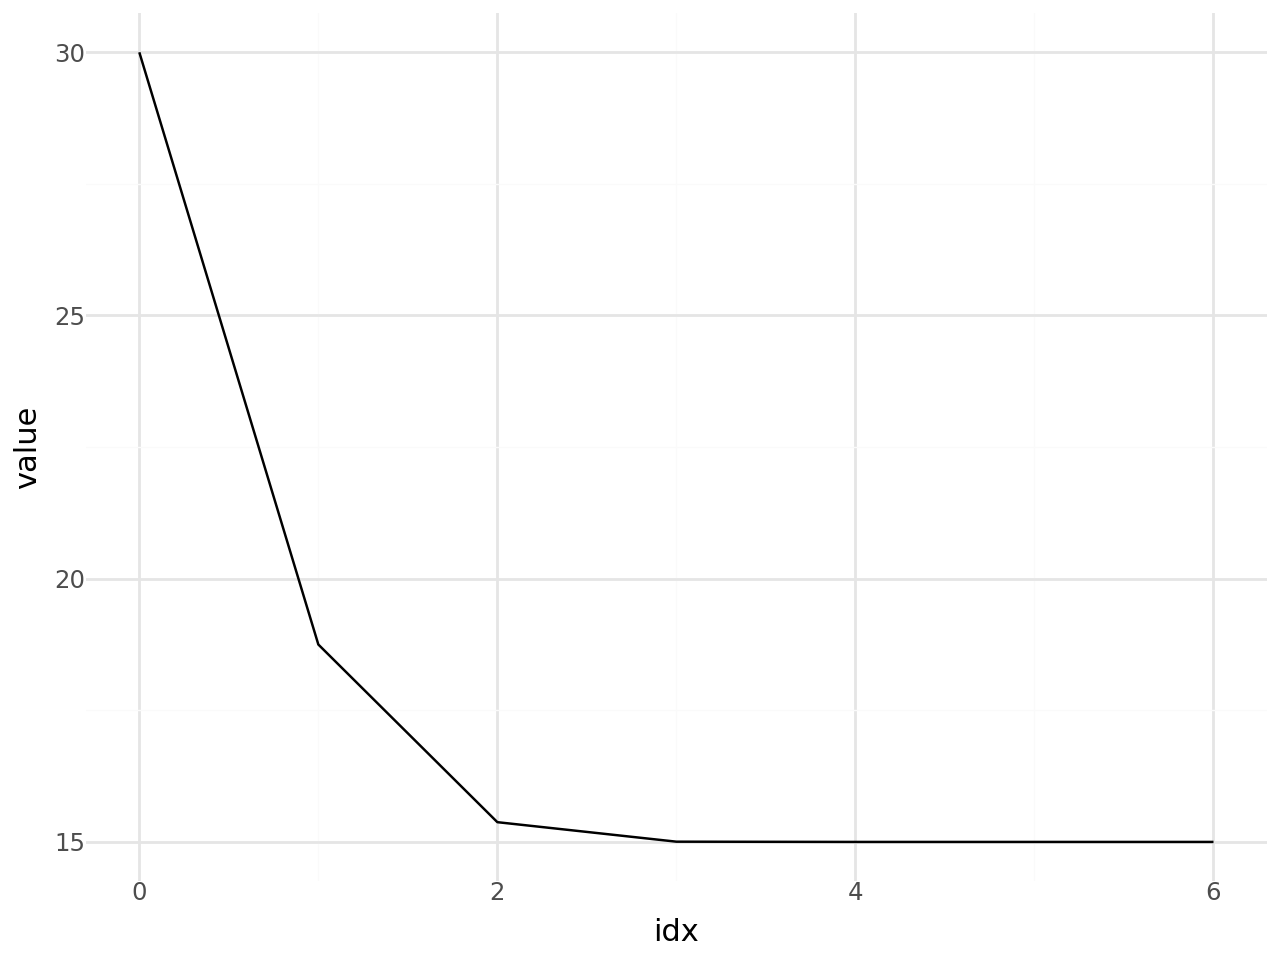

In [13]:
# List of initial values
g_vals = (1, 5, 10, 15, 20, 25, 30)

# The number to take the root of
g_num = 225

# The root
g_root = 2

for val in g_vals:
    g = rth_rootx(g_num, val, g_root)
    
    g_len = len(g["path"])
    
    g_df = pd.DataFrame(g["path"])
    g_df["idx"] = list(range(g_len))
    g_df.rename(columns = {0: "value"}, inplace=True)
    g_df = g_df[["idx", "value"]]
    
    g_plot = (
        ggplot(data = g_df, mapping = aes(x = "idx", y = "value")) + 
        geom_line() + 
        theme_minimal()
    )

    print(f"The convergence path for the initial value x = {val}:\n")
    print(f"Convergence achieved in {g_len} steps.\n")
    print(f"The average step size is {round(mean(g_df.value), 3)} and the median is {round(median(g_df.value), 3)}.\n")
    print(g_df)
    display(g_plot)

### Multivariate Newton

$$
\mathbf{x}_{n+1}=\mathbf{x}_n-H_f^{-1}J_f
$$

Where $H_f=\nabla^2 f(x_n)$ denotes the Hessian and $J_f=\nabla f(x_n)$ the Jacobian matrices. This is multivariate extension of the singlevariate form $x_{n+1}=x_n-\frac{f'(x_n)}{f''(x_n)}$.

Applied to a likelihood maximisation problem, we have,

$$\hat{\theta}^{(1)}=\hat{\theta}^{(0)}-\frac{\ell'(\hat{\theta}^{(0)})}{\ell''(\hat{\theta}^{(0)})}$$

Where $\theta$ stands for the vector of parameters solved for, and $\ell(\theta)=\ln{\left(\mathcal{L}(\theta)\right)}$ stands for the log-likelihood function.

## Reference material

Bird, J. (2021) *Bird's Higher Engineering Mathematics*, 9th edn. Routledge.

Gezerlis, A. (2023) *Numerical Methods in Physics with Python*, 2nd edn. Cambridge University Press.

HELM (2008) '12.3 The Newton-Raphson Method'. https://share.google/eFGY99Mffq5sBJd1A

HELM (2008) '31 Numerical Methods of Approximation'. https://share.google/qhznOJXAJut3ZO56Q

Hogg, V.R., McKean, J.W. and Craig, A.T. (2020) *Introduction to Mathematical Statistics*, 8th edn. Pearson.

Johnson, S.G. (2015) 'Square Roots via Newton’s Method'. https://math.mit.edu/~stevenj/18.335/newton-sqrt.pdf

Kong, Q., Siauw, T. and Bayen, A. (2020) 'Newton-Raphson Method'. https://pythonnumericalmethods.studentorg.berkeley.edu/notebooks/chapter19.04-Newton-Raphson-Method.html

Kong, Q., Siauw, T. and Bayen, A. (2021) *Python Programming and Numerical Methods: A Guide for Engineers and Scientists*. Academic Press.

Stewart, J., Clegg, D. and Watson, S. (2021) *Calculus: Single Variable Calculus, Early Transcendentals*, Metric Version, 9th edn. Cengage.

Wikipedia (n.d.) 'Finite difference'. https://en.wikipedia.org/wiki/Finite_difference

Wikipedia (n.d.) 'Newton's method'. https://en.wikipedia.org/wiki/Newton%27s_method

Wikipedia (n.d.) 'Newton's method in optimization'. https://en.wikipedia.org/wiki/Newton's_method_in_optimization